In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/Advertising.csv')

In [2]:
df.drop(columns=['Radio', 'Newspaper'], inplace=True)

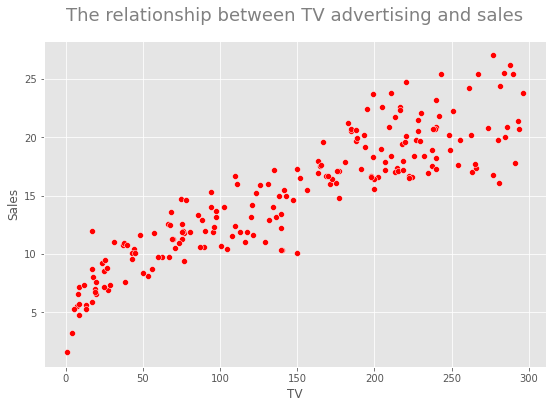

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(9, 6))

sns.scatterplot(x='TV', y = 'Sales', data=df, ax=ax, color='red')

ax.set_title('The relationship between TV advertising and sales', pad=20, size=18, color='gray')

plt.savefig('img_output/manual_scaterplot.png')

In [4]:
m = df['Sales'].values.size

In [5]:
x = np.append(np.ones((m, 1)), df['TV'].values.reshape(m, 1), axis=1)

In [6]:
y = df['Sales'].values.reshape(m, 1)

In [7]:
theta = np.zeros((2, 1))

theta

array([[0.],
       [0.]])

In [8]:
theta.shape

(2, 1)

## #1 Cost Function

$J(\theta_{0}, \theta_{1}) = \frac{1}{2m} \sum_{i = 1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^{2}$

In [9]:
def cost_function(x, y, theta):
    y_pred = np.dot(x, theta)
    sqrd_error = (y_pred - y) ** 2
    cost = 1 / (2 * m) * np.sum(sqrd_error)
    
    return cost

In [10]:
cost_function(x, y, theta)

128.355975

## #2 Gradient Descent

$repeat\ until\ convergence:$

$\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum_{i = 1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})$

$\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum_{i = 1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})\ . x^{(i)}$

In [11]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []
    
    for i in range(iterations):
        y_pred = np.dot(x, theta)
        
        # X[0] = 1, X[1] = Val
        der = np.dot(x.transpose(), (y_pred - y)) / m
        theta -= alpha * der
        costs.append(cost_function(x, y, theta))
        
    return theta, costs

In [12]:
theta, costs = gradient_descent(x, y, theta, alpha=0.000068, iterations=400000)

#### The costs function result:

In [13]:
costs[-1]

2.608878340603866

## #3 Plot the Convergence

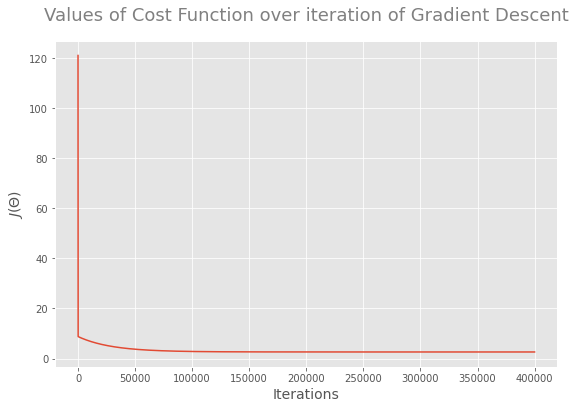

In [14]:
fig, ax = plt.subplots(figsize = (9, 6))

ax.plot(costs)

ax.set_title("Values of Cost Function over iteration of Gradient Descent", pad=20, size=18, color='gray')
ax.set_xlabel("Iterations", size=14)
ax.set_ylabel("$J(\Theta)$", size=14)
plt.savefig('img_output/manual_cost_and_iteration.png')

#### The theta results:

In [15]:
theta

array([[6.96771727],
       [0.05550085]])

In [16]:
np.around(theta, 3)

array([[6.968],
       [0.056]])

## #4 Train the Model

#### Making Prediction:

$Sales = \theta_{0} + \theta_{1} \times TV$

In [17]:
y_pred = np.dot(x, np.round(theta, 3))

dic = {'sales (Actual)': y.flatten(),
       'sales (Predicted)': np.round(y_pred, 1).flatten()}

df1 = pd.DataFrame(dic)

In [18]:
df1.head()

,sales (Actual),sales (Predicted)
0,22.1,19.9
1,10.4,9.5
2,12.0,7.9
3,16.5,15.5
4,17.9,17.1


In [19]:
theta

array([[6.96771727],
       [0.05550085]])

In [23]:
def predict(tv_ads):
    x = np.array([1, tv_ads]).reshape(1, 2)
    y_pred = np.dot(x, theta)
    
    return y_pred[0, 0]

In [24]:
predict(500)

34.718141010798206

#### Show the Model and Applied to All the Data

c:\users\rohman\documents\pyenvironment\test-py.3.7.9-all-packages\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


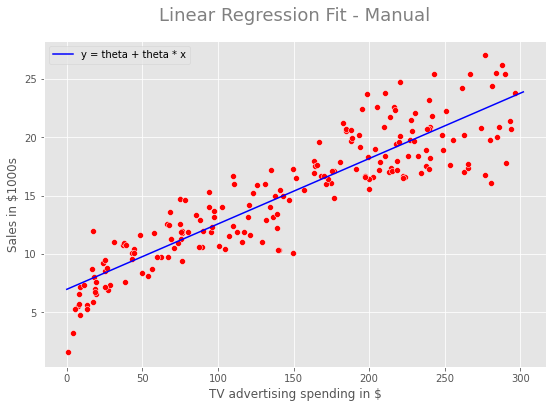

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x='TV', y='Sales', data=df, ax=ax, color='red')

# Create random data based on theta and x value
a = np.round(theta, 3)
x_value = np.array(range(0, 303))
# theta + theta * x
y_value = a[0, 0] + (a[1, 0] * x_value)


sns.lineplot(x_value, y_value, ax=ax, label='y = theta + theta * x', color='blue')

ax.set_title('Linear Regression Fit - Manual', pad=20, size=18, color='gray')
ax.set_xlabel('TV advertising spending in $')
ax.set_ylabel('Sales in $1000s')
ax.legend(loc='upper left')
plt.savefig('img_output/manual_linear_regression_fit.png')

## #5 Evaluate the Model Performance

In [28]:
R_squared = 0.9 ** 2
MSE = ((y - y_pred) ** 2).sum() / m
RMSE = np.sqrt(MSE)
print('R^2: ', np.round(R_squared, 2))
print('RMSE: ', np.round(RMSE, 2))

R^2:  0.81
RMSE:  2.29


**R²** value is 0.61. It means that **61% of the variability observed in the sales is explained or captured by our model and the other 39% is due to some other factors**. With R²=0.61, the model is not actually very good.

**RMSE** value is 3.24. It means that on average, the predictions of the model are 3.24 units away from the actual values.

#### Plot the Predicted Sales compared with the Real Sales

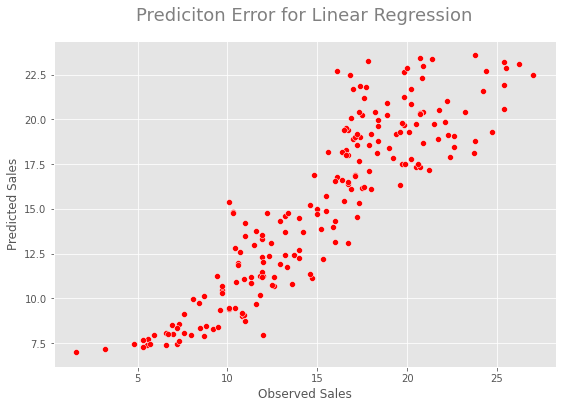

In [29]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.scatterplot(x=y.flatten(), y=y_pred.flatten(), ax=ax, color='red')

ax.set_title('Prediciton Error for Linear Regression', pad=20, size=18, color='gray')
ax.set_xlabel('Observed Sales')
ax.set_ylabel('Predicted Sales')
plt.savefig('img_output/manual_prediction_error.png')

#### Calculate the Residual and Analyze the Distribution

c:\users\rohman\documents\pyenvironment\test-py.3.7.9-all-packages\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


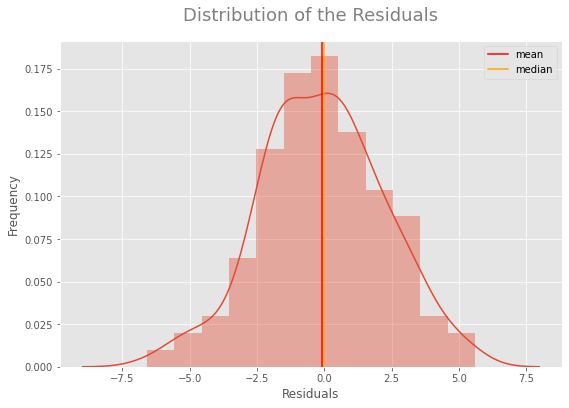

In [30]:
fig, ax = plt.subplots(figsize=(9, 6))

residuals = (y - y_pred)

sns.distplot(residuals.flatten(), ax=ax)
ax.axvline(x = np.mean(residuals), color='red', label='mean')
ax.axvline(x = np.median(residuals), color='orange', label='median')
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of the Residuals', pad=20, size=18, color='gray')
ax.legend(loc='upper right')
plt.savefig('img_output/manual_distribution_of_the_residuals.png')

In [31]:
np.mean(residuals)

-0.07188000000000035

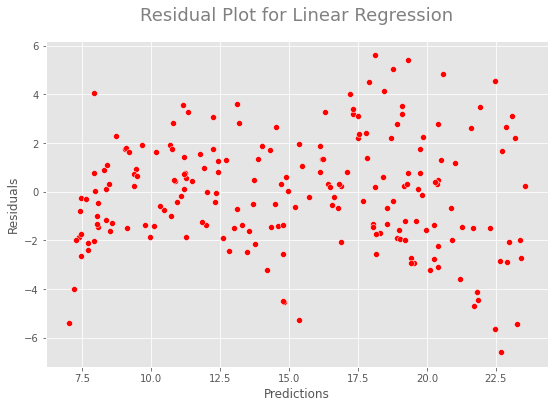

In [32]:
fig, ax = plt.subplots(figsize=(9, 6))

residuals = y - y_pred

sns.scatterplot(x = y_pred.flatten(), y = residuals.flatten(), ax=ax, color='red')

ax.set_title('Residual Plot for Linear Regression', pad=20, size=18, color='gray')
ax.set_xlabel('Predictions')
ax.set_ylabel('Residuals')
plt.savefig('img_output/manual_residual_plot.png')